In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# import the dataset
df = pd.read_csv("data/coursera_2021-11-29_12:00.csv",index_col=0)


In [4]:
df.head()

,course_title,course_organization,course_Certificate_type,course_students_enrolled,coursera_subject,FL_category,duration,course_rating,course_difficulty
1,Key Technologies for Business,IBM,Specialization,670k,Business,business_and_management,1-3 Months,4.7,Beginner
2,Financial Markets,Yale University,Course,1.1m,Business,business_and_management,1-3 Months,4.8,Beginner
3,Successful Negotiation: Essential Strategies a...,University of Michigan,Course,1.1m,Business,business_and_management,1-3 Months,4.8,Mixed
4,"Brand Management: Aligning Business, Brand and...",University of London,Course,230k,Business,business_and_management,1-3 Months,4.9,Beginner
5,Impact Measurement & Management for the SDGs,Duke University,Course,4.1k,Business,business_and_management,1-3 Months,4.9,Mixed


# Analyze the Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9023 entries, 1 to 9023
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              9023 non-null   object 
 1   course_organization       9023 non-null   object 
 2   course_Certificate_type   9023 non-null   object 
 3   course_students_enrolled  9023 non-null   object 
 4   coursera_subject          9023 non-null   object 
 5   FL_category               9023 non-null   object 
 6   duration                  9023 non-null   object 
 7   course_rating             9023 non-null   float64
 8   course_difficulty         9023 non-null   object 
dtypes: float64(1), object(8)
memory usage: 704.9+ KB


In [6]:
df.columns

Index(['course_title', 'course_organization', 'course_Certificate_type',
       'course_students_enrolled', 'coursera_subject', 'FL_category',
       'duration', 'course_rating', 'course_difficulty'],
      dtype='object')

In [7]:
df.isnull().sum()

course_title                0
course_organization         0
course_Certificate_type     0
course_students_enrolled    0
coursera_subject            0
FL_category                 0
duration                    0
course_rating               0
course_difficulty           0
dtype: int64

# Data Visualation

Course                      6004
Guided Project              2268
Specialization               696
Professional Certificate      55
Name: course_Certificate_type, dtype: int64


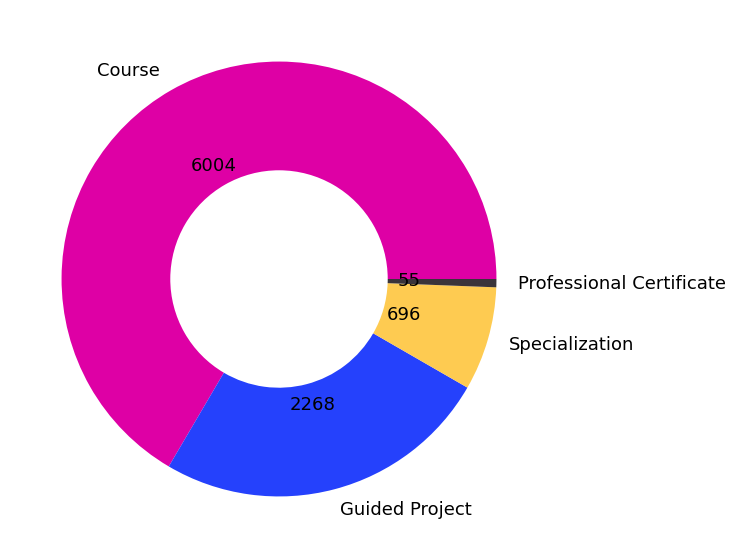

In [8]:
labels=['Course','Guided Project','Specialization','Professional Certificate ']
colours=['#de00a5','#2541fc','#fecb51','#3a343a']

data=df.course_Certificate_type.value_counts()
print(data)
def absolute_value(val):
    a  = int(np.round(val/100.*data.sum(), decimals=1))
    return a
plt.figure(figsize=(20,10))
plt.pie(data,
       wedgeprops={'width':0.5},labels=labels,
        autopct=absolute_value,
        colors=colours,
        textprops={'fontsize': 18})
# plt.title("Course certification Analysis",fontsize=16)
# plt.legend()
plt.show()

Beginner        4409
Intermediate    2783
Mixed           1548
Advanced         283
Name: course_difficulty, dtype: int64


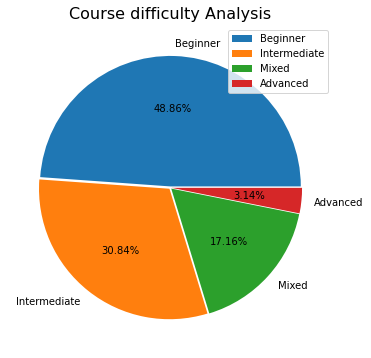

In [9]:
data=df.course_difficulty.value_counts()
print(data)
labels=['Beginner','Intermediate','Mixed','Advanced']

def absolute_value(val):
    a  = np.round(val/100.*data.sum(), 0)
    return a
plt.figure(figsize=(20,6))
plt.pie(data,labels=labels,autopct='%0.02f%%',explode=[0.01,0.01,0.01,0.01])
plt.title("Course difficulty Analysis",fontsize=16)

plt.legend()
plt.show()

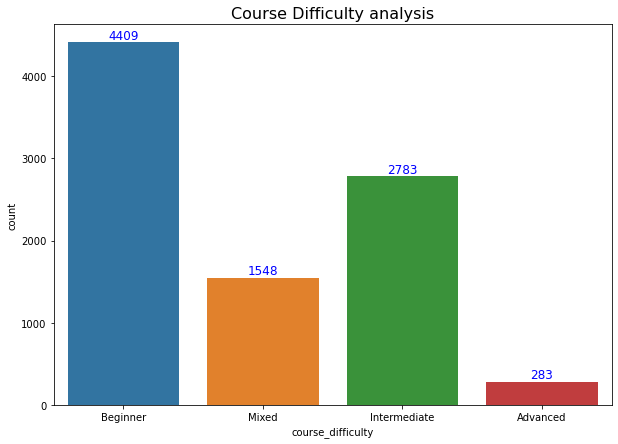

In [10]:
plt.figure(figsize=(10,7))
plt.title("Course Difficulty analysis",fontsize=16)
ax=sns.countplot(x="course_difficulty",data=df)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d'% int(p.get_height()),
           fontsize=12,color='blue',ha='center',va='bottom')

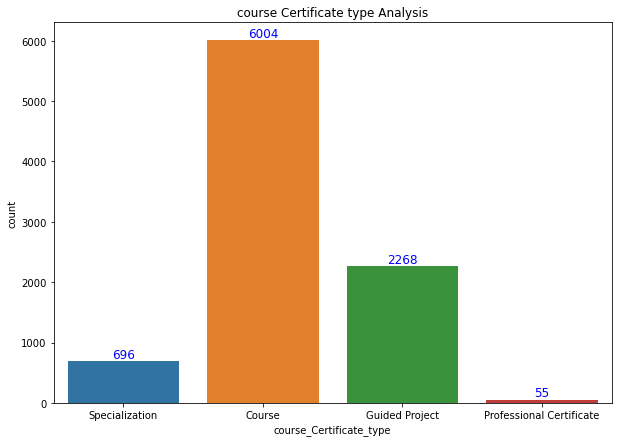

In [11]:
plt.figure(figsize=(10,7))
plt.title("course Certificate type Analysis")

ax=sns.countplot(x="course_Certificate_type",data=df)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d'% int(p.get_height()),
           fontsize=12,color='blue',ha='center',va='bottom')

In [12]:
# convert enrolled to no.
df['course_students_enrolled']=df['course_students_enrolled'].str.replace('k','*1000')
df['course_students_enrolled']=df['course_students_enrolled'].str.replace('m','*10000')
df['course_students_enrolled']=df['course_students_enrolled'].map(lambda x:eval(x))

In [13]:
df['course_students_enrolled']

1       670000.0
2        11000.0
3        11000.0
4       230000.0
5         4100.0
          ...   
9019     13000.0
9020      1500.0
9021      5700.0
9022     56000.0
9023      3400.0
Name: course_students_enrolled, Length: 9023, dtype: float64

/Users/Amel.Bennaceur/.conda/envs/FLDataAnalysis/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


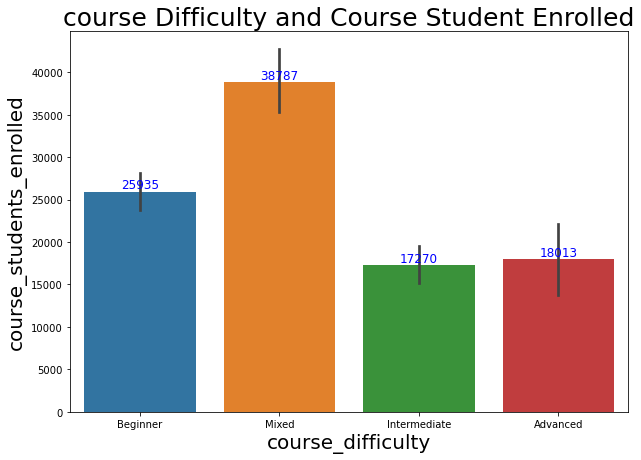

In [14]:
plt.figure(figsize=(10,7))
plt.title("course Difficulty and Course Student Enrolled",fontsize=25)
plt.xlabel("course Difficulty",fontsize=20)
plt.ylabel("Student Enrolled",fontsize=20)
ax=sns.barplot(df.course_difficulty,df.course_students_enrolled)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d'% int(p.get_height()),
           fontsize=12,color='blue',ha='center',va='bottom')

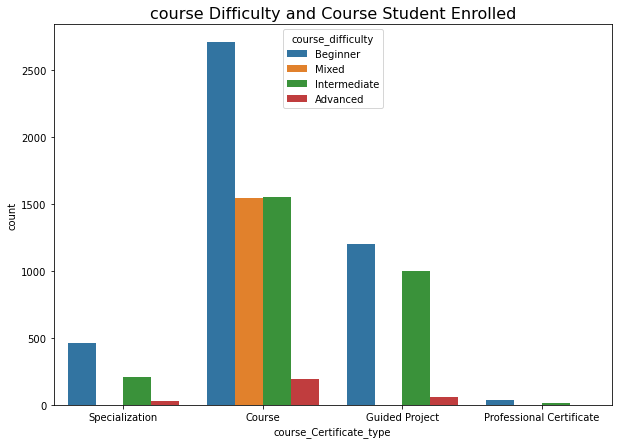

In [15]:
plt.figure(figsize=(10,7))
plt.title("course Difficulty and Course Student Enrolled",fontsize=16)
ax=sns.countplot(x='course_Certificate_type',data=df,hue='course_difficulty')

/Users/Amel.Bennaceur/.conda/envs/FLDataAnalysis/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


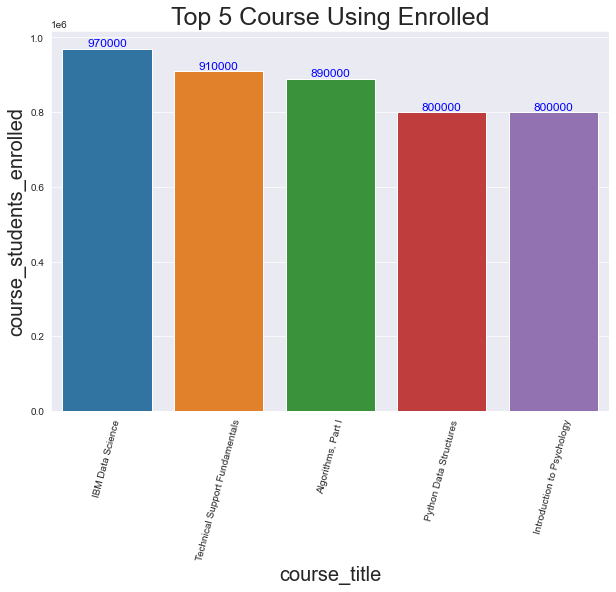

In [16]:
data=df.nlargest(5,'course_students_enrolled')
sns.set_style("darkgrid")
plt.figure(figsize=(10,7))
plt.title("Top 5 Course Using Enrolled",fontsize=25)
plt.xlabel("Top 5 Course",fontsize=20)
plt.ylabel("Student Enrolled",fontsize=20)

ax=sns.barplot(data.course_title,data.course_students_enrolled)
ax.set_xticklabels(rotation=75,labels=data.course_title)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d'% int(p.get_height()),
           fontsize=12,color='blue',ha='center',va='bottom')

/Users/Amel.Bennaceur/.conda/envs/FLDataAnalysis/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


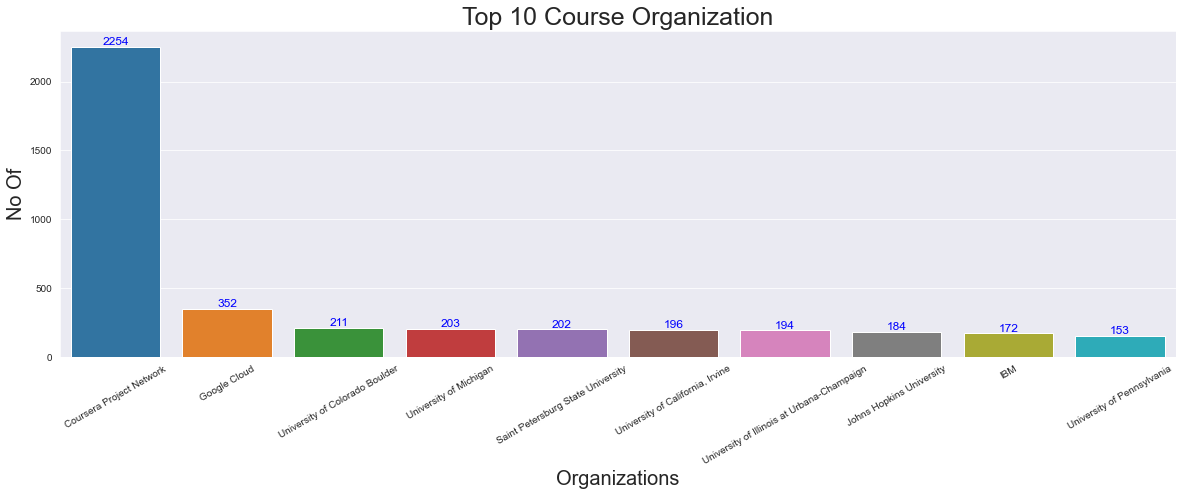

In [17]:
plt.figure(figsize=(20,6))
sns.set_style("darkgrid")
Top10=df.course_organization.value_counts().sort_values(ascending=False).head(10)
Top10
ax=sns.barplot(Top10.index,Top10.values)
ax.set_xticklabels(rotation=30,labels=Top10.index)
plt.title("Top 10 Course Organization",fontsize=25)
plt.xlabel("Organizations",fontsize=20)
plt.ylabel("No Of",fontsize=20)


for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d'% int(p.get_height()),
           fontsize=12,color='blue',ha='center',va='bottom')
    
plt.show()

ValueError: Could not interpret input 'FL_'

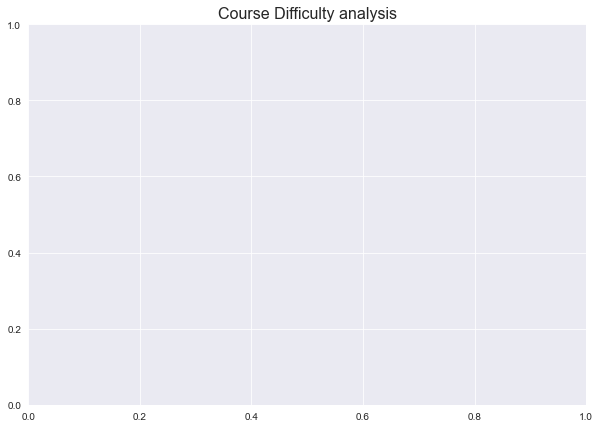

In [18]:
plt.figure(figsize=(10,7))
plt.title("Course Difficulty analysis",fontsize=16)
ax=sns.countplot(x="FL_",data=df)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d'% int(p.get_height()),
           fontsize=12,color='blue',ha='center',va='bottom')

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Course Category Analysis")

ax=sns.countplot(x="FL_category",data=df)
plt.xticks(rotation=45)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d'% int(p.get_height()),
           fontsize=12,color='blue',ha='center',va='bottom')

In [ ]:
# convert enrolled to no.
df['course_students_enrolled']=df['course_students_enrolled'].str.replace('k','*1000')
df['course_students_enrolled']=df['course_students_enrolled'].str.replace('m','*10000')
df['course_students_enrolled']=df['course_students_enrolled'].map(lambda x:eval(x))

In [ ]:
df['course_students_enrolled']

In [ ]:
plt.figure(figsize=(10,7))
plt.title("course category and Course Student Enrolled",fontsize=25)
plt.xlabel("course Category",fontsize=20)
plt.ylabel("Student Enrolled",fontsize=20)
plt.xticks(rotation=45)
ax=sns.barplot(df.FL_category,df.course_students_enrolled)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d'% int(p.get_height()),
           fontsize=12,color='blue',ha='center',va='bottom')

In [ ]:
plt.figure(figsize=(10,7))
plt.title("course Category and  Student Enrolled",fontsize=16)
plt.xticks(rotation=45)
ax=sns.countplot(x='course_Certificate_type',data=df,hue='course_difficulty')
